In [1]:
import pandas as pd
from sklearn import model_selection
import numpy as np

### Exploration of Dataset

In [2]:
df = pd.read_csv("cumulative.csv")

print('number of classes = ', len(df['action'].value_counts()))
print('names of classes  = ', df['action'].value_counts().index.values)
print('\nPercentage of each class in the dataset :\n', [i/len(df)*100 for i in df['action'].value_counts()])
print('\nEach class in the dataset :\n', df['action'].value_counts())

number of classes =  6
names of classes  =  ['walking' 'sit' 'pushups' 'fall' 'walking-with-hands-up' 'actions1']

Percentage of each class in the dataset :
 [34.43654529733884, 24.59890479392833, 17.43923527716399, 12.926313766932463, 7.383033912959938, 3.215966951676434]

Each class in the dataset :
 walking                  14338
sit                      10242
pushups                   7261
fall                      5382
walking-with-hands-up     3074
actions1                  1339
Name: action, dtype: int64


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41636 entries, 0 to 41635
Data columns (total 35 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   nose_x           41636 non-null  float64
 1   nose_y           41636 non-null  float64
 2   leftEye_x        41636 non-null  float64
 3   leftEye_y        41636 non-null  float64
 4   rightEye_x       41636 non-null  float64
 5   rightEye_y       41636 non-null  float64
 6   leftEar_x        41636 non-null  float64
 7   leftEar_y        41636 non-null  float64
 8   rightEar_x       41636 non-null  float64
 9   rightEar_y       41636 non-null  float64
 10  leftShoulder_x   41636 non-null  float64
 11  leftShoulder_y   41636 non-null  float64
 12  rightShoulder_x  41636 non-null  float64
 13  rightShoulder_y  41636 non-null  float64
 14  leftElbow_x      41636 non-null  float64
 15  leftElbow_y      41636 non-null  float64
 16  rightElbow_x     41636 non-null  float64
 17  rightElbow_y

##### We can see only 6 since there is clash in naming 
For example there are two videos ending with **"sit"** and the above is a result of only unique values

In [4]:
sss = model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# the for loop is for when we want to see the index of train and test from one or more splits
for train_index, test_index in sss.split(X, y):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 9620 12562 31273 ... 36356 18053 24086] TEST: [20795  4378 34318 ... 31790 17048  2760]


In [5]:
print('Percentage of each class after split :\n', [i/len(y_train)*100 for i in y_train.value_counts()])

Percentage of each class after split :
 [34.436171490332654, 24.597694247628198, 17.44025459349105, 12.927825147111804, 7.38261078419599, 3.2154437372403026]


### We can observe that the percentage of class is preserved
Moving ahead we could choose to **downsample** the data so all can match with the lowest data we have or **upsample** and create new data so as to match with the highest data sample we have

##### The below two blocks of code are to provide a base to compare DL models to ML model (Random Forest)

# Random Forest Classifier (RFC)

In [7]:
# Applying Random Forest

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_features=None, n_jobs=-1, verbose=1)
params = {'criterion' : ['gini', 'entropy'],
          'n_estimators' : [10, 100, 1000, 10000]}

model = GridSearchCV(rfc, params).fit(X_train, y_train)
print('Best estimator = ', model.best_estimator_,'\nBest score = ',model.best_score_,'\nBest Params =',model.best_params_)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    2.5s remaining:    6.0s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    2.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 concurrent workers.
[Parallel(n_jobs=10)]: Done   3 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done   7 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=10)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    1.1s remaining:    2.7s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    1.2s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    1.6s finished
[Parallel(n_jobs=10)]: Using backend ThreadingBackend with 10 con

KeyboardInterrupt: 

In [8]:
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix
import pickle

filename = "RFC.pickle"
#pickle.dump(model, open(filename, "wb"))

model = pickle.load(open(filename, 'rb'))

y_pred = model.predict(X_test)
confusion_matrix(y_test, y_pred)

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:    0.0s
[Parallel(n_jobs=12)]: Done 488 tasks      | elapsed:    0.1s
[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:    0.2s
[Parallel(n_jobs=12)]: Done 1000 out of 1000 | elapsed:    0.3s finished


array([[ 267,    0,    1,    0,    0,    0],
       [   0, 1070,    2,    2,    2,    0],
       [   0,    1, 1451,    0,    0,    0],
       [   0,    2,    0, 2045,    2,    0],
       [   0,    0,    0,    0, 2868,    0],
       [   0,    0,    0,    0,    1,  614]], dtype=int64)

In [9]:
multilabel_confusion_matrix(y_test, y_pred)

array([[[8060,    0],
        [   1,  267]],

       [[7249,    3],
        [   6, 1070]],

       [[6873,    3],
        [   1, 1451]],

       [[6277,    2],
        [   4, 2045]],

       [[5455,    5],
        [   0, 2868]],

       [[7713,    0],
        [   1,  614]]], dtype=int64)

# Artificial Neural Network

In [6]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder().fit(df.iloc[:, -1].values.reshape(-1,1))
df["Transformed"] = enc.transform(df.iloc[:, -1].values.reshape(-1,1))
df['Transformed'] = df['Transformed'].astype('category')

enc.classes_

array(['actions1', 'fall', 'pushups', 'sit', 'walking',
       'walking-with-hands-up'], dtype=object)

In [7]:
import tensorflow as tf

config = tf.ConfigProto()
config.gpu_options.allow_growth = True
sess = tf.Session(config=config)

In [8]:
# tf.__version__ = 1.14.0

#x = tf.placeholder(dtype = tf.float32, shape = [34,1])
#y = tf.placeholder(dtype = tf.int32, shape = [None])


model = tf.keras.Sequential([tf.keras.layers.Dense(1024, activation="relu", name="Dense_1", 
                                                   input_dim=df.T.iloc[:-2, 1].values.reshape(-1, 1).shape[0]),
                             tf.keras.layers.BatchNormalization(name="Batch_Norm"),
                             tf.keras.layers.Dense(720, activation="relu", name="Dense_2"),
                             tf.keras.layers.Dropout(0.5),
                             tf.keras.layers.Dense(480, activation="relu", name="Dense_3"),
                             tf.keras.layers.Dense(360, activation="relu", name="Dense_4"),
                             tf.keras.layers.Dropout(0.2),
                             tf.keras.layers.Dense(180, activation="relu", name="Dense_5"),
                             tf.keras.layers.Dense(len(enc.classes_), activation="softmax", name="Dense_OP")])
#print(model.weights)
model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Dense_1 (Dense)              (None, 1024)              35840     
_________________________________________________________________
Batch_Norm (BatchNormalizati (None, 1024)              4096      
_________________________________________________________________
Dense_2 (Dense)              (None, 720)               738000    
_________________________________________________________________
dropout (Dropout)            (None, 720)               0         
_________________________________________________________________
Dense_3 (Dense)              (None, 480)               346080    
_________________________________________________________________
Dense_4 (Dense)              (None, 360)               173160    
____

In [9]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit_transform(df['action'].values.reshape(-1,1))

y_train = ohe.transform(df['action'][train_index].values.reshape(-1,1)).toarray()
y_test = ohe.transform(df['action'][test_index].values.reshape(-1,1)).toarray()

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test), 
                    batch_size=64, epochs=200, verbose=1)
model.save('ANN', save_format='h5')

In [14]:
pd.DataFrame(model.predict(df.iloc[[1,40000,10000], :-2])*100, columns=ohe.categories_)

,actions1,fall,pushups,sit,walking,walking-with-hands-up
0,1.502488e-23,1.492138e-08,1.000000e+02,1.956379e-16,4.557021e-30,1.454286e-36
1,7.599753e-06,1.460749e-01,5.056357e-07,1.482018e+00,9.837190e+01,3.146163e-26
2,4.132521e-07,1.614171e-05,9.355701e-08,3.542042e-02,9.939874e+01,5.658157e-01


In [15]:
with open('OneHotEncoding categories.txt', 'w') as f:
    f.write(str(ohe.categories_[0]))

In [16]:
str(ohe.categories_[0])

"['actions1' 'fall' 'pushups' 'sit' 'walking' 'walking-with-hands-up']"


Bad key "text.kerning_factor" on line 4 in
D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


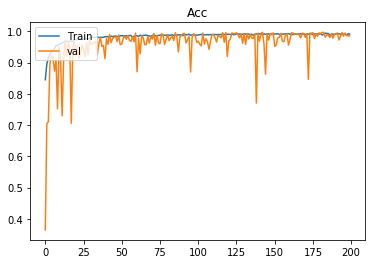

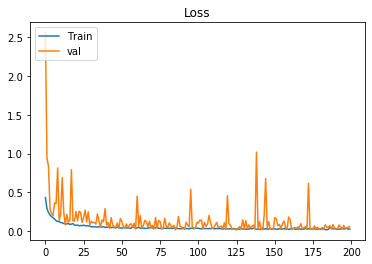

In [17]:
import matplotlib.pyplot as plt

plt.plot(history.epoch, history.history['acc'])
plt.plot(history.epoch, history.history['val_acc'])
plt.title('Acc')
plt.legend(['Train', "val"], loc='upper left')
plt.show()

plt.plot(history.epoch, history.history['loss'])
plt.plot(history.epoch, history.history['val_loss'])
plt.title('Loss')
plt.legend(['Train', "val"], loc='upper left')
plt.show()

In [18]:
model.predict_classes(df.iloc[1:2, :-2])

array([2], dtype=int64)

In [19]:
df["Transformed"] = df["Transformed"].astype('int64')

In [20]:
confusion_matrix(df['Transformed'][test_index], model.predict_classes(df.iloc[:, :-2])[test_index])

array([[ 268,    0,    0,    0,    0,    0],
       [   3, 1028,    6,   39,    0,    0],
       [   0,    2, 1449,    0,    1,    0],
       [   1,    0,    0, 2041,    7,    0],
       [   0,    6,    0,   45, 2817,    0],
       [   0,    0,    0,   11,    0,  604]], dtype=int64)

# Convolutional neural Network (CNN)

In [21]:
from tqdm import tqdm
import scipy.stats as stats

X_CNN = []
Y_CNN = []

# Since its 30 frames per second
seconds = 2
buffer_size = seconds*30 
shift_size = 30

# Number of Features = 34
for i in tqdm(range(0, (df.shape[0]-buffer_size), shift_size)):
    X_frame = np.zeros((buffer_size,34))
    for j in range(34):
        X_frame[:,j] = df.iloc[:, :-2].values[:,j] [i:i+buffer_size]
    label = stats.mode(df.iloc[:, -2].values[i:i+buffer_size])[0][0]
    X_CNN.append(X_frame)
    Y_CNN.append(label)

X_CNN = np.asarray(X_CNN).reshape(-1,buffer_size,34)
Y_CNN = np.asarray(Y_CNN)
X_CNN.shape, Y_CNN.shape

100%|███████████████████████████████████████████████████████████████████████████████████████████████| 1386/1386 [04:34<00:00,  5.05it/s]


((1386, 60, 34), (1386,))

In [22]:
# Necessary modifications for CNN
X_CNN = X_CNN.reshape(X_CNN.shape[0],
                      X_CNN.shape[1],
                      X_CNN.shape[2],
                      1)
X_CNN.shape

(1386, 60, 34, 1)

In [23]:
sss = model_selection.StratifiedShuffleSplit(n_splits=1, test_size=0.2)

for train_index, test_index in sss.split(X_CNN, Y_CNN):
    print("TRAIN shape : ", train_index.shape, "\nTEST shape : ", test_index.shape)

TRAIN shape :  (1108,) 
TEST shape :  (278,)


In [39]:
model_CNN = tf.keras.Sequential([tf.keras.layers.Conv2D(64, kernel_size=(2,2), activation="relu", name="Conv_1",
                                                        input_shape=X_CNN[0].shape),
                                 tf.keras.layers.Dropout(0.5),
                                 tf.keras.layers.Conv2D(64, kernel_size=(2,2), activation="relu", name="Conv_2"),
                                 tf.keras.layers.Flatten(),
                                 tf.keras.layers.Dropout(0.2),
                                 tf.keras.layers.Dense(32, activation="relu", name="Dense_1"),
                                 tf.keras.layers.Dense(32, activation="relu", name="Dense_2"),
                                 tf.keras.layers.Dropout(0.25),
                                 tf.keras.layers.Dense(16, activation="relu", name="Dense_3"),
                                 tf.keras.layers.Dense(10, activation="relu", name="Dense_4"),
                                 tf.keras.layers.Dense(len(enc.classes_), activation="softmax", name="Dense_OP")])

model_CNN.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])
model_CNN.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv_1 (Conv2D)              (None, 59, 33, 64)        320       
_________________________________________________________________
dropout_6 (Dropout)          (None, 59, 33, 64)        0         
_________________________________________________________________
Conv_2 (Conv2D)              (None, 58, 32, 64)        16448     
_________________________________________________________________
flatten_1 (Flatten)          (None, 118784)            0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 118784)            0         
_________________________________________________________________
Dense_1 (Dense)              (None, 32)                3801120   
_________________________________________________________________
Dense_2 (Dense)              (None, 32)               

In [40]:
history_CNN = model_CNN.fit(X_CNN[train_index], ohe.transform(Y_CNN[train_index].reshape(-1,1)).toarray(),
                            validation_data=(X_CNN[test_index], ohe.transform(Y_CNN[test_index].reshape(-1,1)).toarray()), 
                            batch_size=64, epochs=400, verbose=1)
model_CNN.save('CNN', save_format='h5')

Train on 1108 samples, validate on 278 samples
Epoch 1/400
1108/1108 [==============================] - 1s 639us/sample - loss: 104.9915 - acc: 0.2329 - val_loss: 1.7839 - val_acc: 0.3885
Epoch 2/400
1108/1108 [==============================] - 0s 270us/sample - loss: 3.0822 - acc: 0.2933 - val_loss: 1.7900 - val_acc: 0.2518
Epoch 3/400
1108/1108 [==============================] - 0s 273us/sample - loss: 1.8470 - acc: 0.1778 - val_loss: 1.7855 - val_acc: 0.2482
Epoch 4/400
1108/1108 [==============================] - 0s 272us/sample - loss: 1.7801 - acc: 0.2329 - val_loss: 1.7792 - val_acc: 0.2446
Epoch 5/400
1108/1108 [==============================] - 0s 274us/sample - loss: 1.7623 - acc: 0.2798 - val_loss: 1.7723 - val_acc: 0.2446
Epoch 6/400
1108/1108 [==============================] - 0s 311us/sample - loss: 1.7448 - acc: 0.3231 - val_loss: 1.7644 - val_acc: 0.2446
Epoch 7/400
1108/1108 [==============================] - 0s 298us/sample - loss: 1.7237 - acc: 0.3403 - val_loss: 1.7

1108/1108 [==============================] - 0s 277us/sample - loss: 1.0572 - acc: 0.5975 - val_loss: 1.0890 - val_acc: 0.5863
Epoch 60/400
1108/1108 [==============================] - 0s 275us/sample - loss: 1.1386 - acc: 0.5569 - val_loss: 1.0740 - val_acc: 0.5827
Epoch 61/400
1108/1108 [==============================] - 0s 275us/sample - loss: 1.0845 - acc: 0.5758 - val_loss: 1.1216 - val_acc: 0.5719
Epoch 62/400
1108/1108 [==============================] - 0s 280us/sample - loss: 1.0895 - acc: 0.5632 - val_loss: 1.0670 - val_acc: 0.5935
Epoch 63/400
1108/1108 [==============================] - 0s 276us/sample - loss: 1.0940 - acc: 0.5406 - val_loss: 1.0837 - val_acc: 0.5899
Epoch 64/400
1108/1108 [==============================] - 0s 276us/sample - loss: 1.0943 - acc: 0.5875 - val_loss: 1.0548 - val_acc: 0.6151
Epoch 65/400
1108/1108 [==============================] - 0s 278us/sample - loss: 1.0836 - acc: 0.5695 - val_loss: 1.1285 - val_acc: 0.5683
Epoch 66/400
1108/1108 [=========

1108/1108 [==============================] - 0s 278us/sample - loss: 0.5519 - acc: 0.8457 - val_loss: 0.6632 - val_acc: 0.8489
Epoch 118/400
1108/1108 [==============================] - 0s 280us/sample - loss: 0.6247 - acc: 0.8294 - val_loss: 0.8488 - val_acc: 0.7770
Epoch 119/400
1108/1108 [==============================] - 0s 280us/sample - loss: 0.5685 - acc: 0.8493 - val_loss: 0.5452 - val_acc: 0.8705
Epoch 120/400
1108/1108 [==============================] - 0s 276us/sample - loss: 0.5462 - acc: 0.8664 - val_loss: 0.5776 - val_acc: 0.8597
Epoch 121/400
1108/1108 [==============================] - 0s 280us/sample - loss: 0.5811 - acc: 0.8601 - val_loss: 0.6634 - val_acc: 0.8417
Epoch 122/400
1108/1108 [==============================] - 0s 276us/sample - loss: 0.5036 - acc: 0.8547 - val_loss: 0.5845 - val_acc: 0.8705
Epoch 123/400
1108/1108 [==============================] - 0s 276us/sample - loss: 0.4931 - acc: 0.8700 - val_loss: 0.6305 - val_acc: 0.8525
Epoch 124/400
1108/1108 [==

1108/1108 [==============================] - 0s 277us/sample - loss: 0.3261 - acc: 0.9152 - val_loss: 0.7489 - val_acc: 0.8237
Epoch 176/400
1108/1108 [==============================] - 0s 276us/sample - loss: 0.3314 - acc: 0.9125 - val_loss: 0.7161 - val_acc: 0.8633
Epoch 177/400
1108/1108 [==============================] - 0s 277us/sample - loss: 0.3515 - acc: 0.9061 - val_loss: 0.7067 - val_acc: 0.8489
Epoch 178/400
1108/1108 [==============================] - 0s 276us/sample - loss: 0.3302 - acc: 0.9134 - val_loss: 0.6973 - val_acc: 0.8525
Epoch 179/400
1108/1108 [==============================] - 0s 285us/sample - loss: 0.3400 - acc: 0.9079 - val_loss: 0.6999 - val_acc: 0.8489
Epoch 180/400
1108/1108 [==============================] - 0s 313us/sample - loss: 0.3332 - acc: 0.9143 - val_loss: 0.8088 - val_acc: 0.8237
Epoch 181/400
1108/1108 [==============================] - 0s 286us/sample - loss: 0.3271 - acc: 0.9106 - val_loss: 0.8022 - val_acc: 0.8201
Epoch 182/400
1108/1108 [==

1108/1108 [==============================] - 0s 403us/sample - loss: 0.2009 - acc: 0.9395 - val_loss: 0.8276 - val_acc: 0.8561
Epoch 234/400
1108/1108 [==============================] - 0s 358us/sample - loss: 0.2253 - acc: 0.9350 - val_loss: 0.7425 - val_acc: 0.8561
Epoch 235/400
1108/1108 [==============================] - 0s 334us/sample - loss: 0.2621 - acc: 0.9287 - val_loss: 0.8231 - val_acc: 0.8237
Epoch 236/400
1108/1108 [==============================] - 0s 307us/sample - loss: 0.2773 - acc: 0.9233 - val_loss: 0.7355 - val_acc: 0.8453
Epoch 237/400
1108/1108 [==============================] - 0s 304us/sample - loss: 0.2544 - acc: 0.9341 - val_loss: 0.8449 - val_acc: 0.8165
Epoch 238/400
1108/1108 [==============================] - 0s 297us/sample - loss: 0.2459 - acc: 0.9314 - val_loss: 0.9253 - val_acc: 0.8417
Epoch 239/400
1108/1108 [==============================] - 0s 275us/sample - loss: 0.2048 - acc: 0.9458 - val_loss: 0.7232 - val_acc: 0.8453
Epoch 240/400
1108/1108 [==

Epoch 291/400
1108/1108 [==============================] - 0s 333us/sample - loss: 0.1836 - acc: 0.9531 - val_loss: 0.8248 - val_acc: 0.8237
Epoch 292/400
1108/1108 [==============================] - 0s 330us/sample - loss: 0.1749 - acc: 0.9567 - val_loss: 0.7977 - val_acc: 0.8381
Epoch 293/400
1108/1108 [==============================] - 0s 329us/sample - loss: 0.1876 - acc: 0.9458 - val_loss: 0.8108 - val_acc: 0.8633
Epoch 294/400
1108/1108 [==============================] - 0s 333us/sample - loss: 0.1823 - acc: 0.9495 - val_loss: 0.7880 - val_acc: 0.8453
Epoch 295/400
1108/1108 [==============================] - 0s 338us/sample - loss: 0.1631 - acc: 0.9576 - val_loss: 0.8369 - val_acc: 0.8525
Epoch 296/400
1108/1108 [==============================] - 0s 336us/sample - loss: 0.1405 - acc: 0.9639 - val_loss: 0.8979 - val_acc: 0.8381
Epoch 297/400
1108/1108 [==============================] - 0s 332us/sample - loss: 0.1558 - acc: 0.9585 - val_loss: 0.9368 - val_acc: 0.8309
Epoch 298/400

Epoch 349/400
1108/1108 [==============================] - 0s 350us/sample - loss: 0.1272 - acc: 0.9675 - val_loss: 1.1834 - val_acc: 0.8309
Epoch 350/400
1108/1108 [==============================] - 0s 354us/sample - loss: 0.1255 - acc: 0.9684 - val_loss: 1.1470 - val_acc: 0.8237
Epoch 351/400
1108/1108 [==============================] - 0s 359us/sample - loss: 0.1120 - acc: 0.9747 - val_loss: 1.1550 - val_acc: 0.8237
Epoch 352/400
1108/1108 [==============================] - 0s 349us/sample - loss: 0.1359 - acc: 0.9666 - val_loss: 1.1789 - val_acc: 0.8058
Epoch 353/400
1108/1108 [==============================] - 0s 350us/sample - loss: 0.1263 - acc: 0.9729 - val_loss: 1.0706 - val_acc: 0.8453
Epoch 354/400
1108/1108 [==============================] - 0s 350us/sample - loss: 0.1241 - acc: 0.9675 - val_loss: 1.0653 - val_acc: 0.8345
Epoch 355/400
1108/1108 [==============================] - 0s 351us/sample - loss: 0.0997 - acc: 0.9738 - val_loss: 1.0966 - val_acc: 0.8237
Epoch 356/400

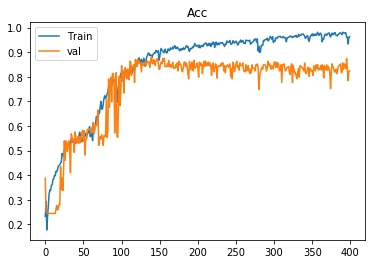

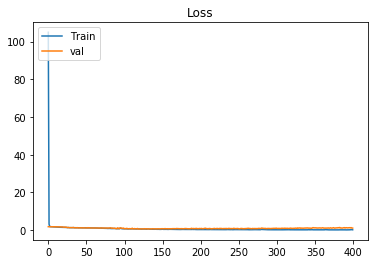

In [41]:
plt.plot(history_CNN.epoch, history_CNN.history['acc'])
plt.plot(history_CNN.epoch, history_CNN.history['val_acc'])
plt.title('Acc')
plt.legend(['Train', "val"], loc='upper left')
plt.show()

plt.plot(history_CNN.epoch, history_CNN.history['loss'])
plt.plot(history_CNN.epoch, history_CNN.history['val_loss'])
plt.title('Loss')
plt.legend(['Train', "val"], loc='upper left')
plt.show()

# RNN

In [27]:
# Necessary modifications for RNN
X_RNN = X_CNN.reshape(X_CNN.shape[0],
                      X_CNN.shape[1],
                      X_CNN.shape[2])

model_RNN = tf.keras.Sequential([tf.keras.layers.SimpleRNN(64, activation="relu", name="RNN_1",
                                                           input_shape=X_RNN.shape[1:]),
                                 tf.keras.layers.Dropout(0.5),
                                 tf.keras.layers.Dense(64, activation="relu", name="Dense_1"),
                                 tf.keras.layers.Dense(32, activation="relu", name="Dense_2"),
                                 tf.keras.layers.Dense(32, activation="relu", name="Dense_3"),
                                 tf.keras.layers.Dense(32, activation="relu", name="Dense_4"),
                                 tf.keras.layers.Dense(10, activation="relu", name="Dense_5"),
                                 tf.keras.layers.Dense(len(enc.classes_), activation="softmax", name="Dense_OP")])

model_RNN.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model_RNN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
RNN_1 (SimpleRNN)            (None, 64)                6336      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
Dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
Dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
Dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
Dense_4 (Dense)              (None, 32)                1056      
_________________________________________________________________
Dense_5 (Dense)              (None, 10)               

In [28]:
history_RNN = model_RNN.fit(X_RNN[train_index], ohe.transform(Y_CNN[train_index].reshape(-1,1)).toarray(),
                            validation_data=(X_RNN[test_index], ohe.transform(Y_CNN[test_index].reshape(-1,1)).toarray()), 
                            batch_size=64, epochs=75, verbose=1)

model_RNN.save('RNN', save_format='h5')

Train on 1108 samples, validate on 278 samples
Epoch 1/75
1108/1108 [==============================] - 1s 1ms/sample - loss: 62.9954 - acc: 0.2482 - val_loss: 8.9398 - val_acc: 0.1547
Epoch 2/75
1108/1108 [==============================] - 1s 808us/sample - loss: 10.6538 - acc: 0.2283 - val_loss: 3.2076 - val_acc: 0.2950
Epoch 3/75
1108/1108 [==============================] - 1s 802us/sample - loss: 4.6524 - acc: 0.2563 - val_loss: 1.8282 - val_acc: 0.1906
Epoch 4/75
1108/1108 [==============================] - 1s 810us/sample - loss: 2.3413 - acc: 0.2085 - val_loss: 1.7921 - val_acc: 0.1799
Epoch 5/75
1108/1108 [==============================] - 1s 809us/sample - loss: 1.9368 - acc: 0.2022 - val_loss: 1.7853 - val_acc: 0.1763
Epoch 6/75
1108/1108 [==============================] - 1s 796us/sample - loss: 1.9158 - acc: 0.1841 - val_loss: 1.7768 - val_acc: 0.1763
Epoch 7/75
1108/1108 [==============================] - 1s 805us/sample - loss: 1.8357 - acc: 0.1796 - val_loss: 1.7685 - val

1108/1108 [==============================] - 1s 1ms/sample - loss: 1.6020 - acc: 0.3448 - val_loss: 1.6004 - val_acc: 0.3453
Epoch 60/75
1108/1108 [==============================] - 1s 1ms/sample - loss: 1.6023 - acc: 0.3439 - val_loss: 1.5996 - val_acc: 0.3453
Epoch 61/75
1108/1108 [==============================] - 1s 867us/sample - loss: 1.6008 - acc: 0.3457 - val_loss: 1.5988 - val_acc: 0.3453
Epoch 62/75
1108/1108 [==============================] - 1s 807us/sample - loss: 1.5993 - acc: 0.3448 - val_loss: 1.5982 - val_acc: 0.3453
Epoch 63/75
1108/1108 [==============================] - 1s 792us/sample - loss: 1.5987 - acc: 0.3448 - val_loss: 1.5975 - val_acc: 0.3453
Epoch 64/75
1108/1108 [==============================] - 1s 799us/sample - loss: 1.6008 - acc: 0.3448 - val_loss: 1.5968 - val_acc: 0.3453
Epoch 65/75
1108/1108 [==============================] - 1s 775us/sample - loss: 1.6025 - acc: 0.3448 - val_loss: 1.5962 - val_acc: 0.3453
Epoch 66/75
1108/1108 [====================

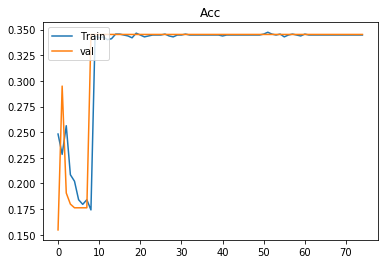

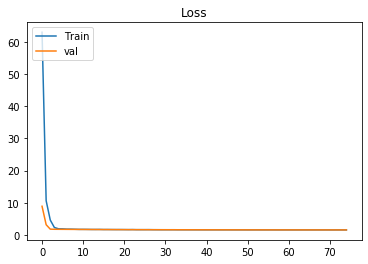

In [29]:
plt.plot(history_RNN.epoch, history_RNN.history['acc'])
plt.plot(history_RNN.epoch, history_RNN.history['val_acc'])
plt.title('Acc')
plt.legend(['Train', "val"], loc='upper left')
plt.show()

plt.plot(history_RNN.epoch, history_RNN.history['loss'])
plt.plot(history_RNN.epoch, history_RNN.history['val_loss'])
plt.title('Loss')
plt.legend(['Train', "val"], loc='upper left')
plt.show()


# LSTM (Long Short Term Memory)

In [30]:
model_LSTM = tf.keras.Sequential([tf.keras.layers.LSTM(64, activation="relu", name="LSTM_1",
                                                      input_shape=X_RNN.shape[1:]),
                                  tf.keras.layers.Dropout(0.5),
                                  tf.keras.layers.Dense(32, activation="relu", name="Dense_1"),
                                  tf.keras.layers.Dense(32, activation="relu", name="Dense_2"),
                                  tf.keras.layers.Dense(32, activation="relu", name="Dense_3"),
                                  tf.keras.layers.Dense(len(enc.classes_), activation="softmax", name="Dense_OP")])

model_LSTM.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

model_LSTM.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
LSTM_1 (LSTM)                (None, 64)                25344     
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
Dense_1 (Dense)              (None, 32)                2080      
_________________________________________________________________
Dense_2 (Dense)              (None, 32)                1056      
_________________________________________________________________
Dense_3 (Dense)              (None, 32)                1056      
_________________________________________________________________
Dense_OP (Dense)             (None, 6)                 198       
Total params: 29,734
Trainable params: 29,734
Non-trainable params: 0
__________________________________________________

In [35]:
history_LSTM = model_LSTM.fit(X_RNN[train_index], ohe.transform(Y_CNN[train_index].reshape(-1,1)).toarray(),
                              validation_data=(X_RNN[test_index], ohe.transform(Y_CNN[test_index].reshape(-1,1)).toarray()), 
                              batch_size=64, epochs=250, verbose=1)

model_LSTM.save('LSTM', save_format='h5')

Train on 1108 samples, validate on 278 samples
Epoch 1/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 2.7624 - acc: 0.3240 - val_loss: 2.0254 - val_acc: 0.3525
Epoch 2/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 2.9835 - acc: 0.3285 - val_loss: 1.7733 - val_acc: 0.3453
Epoch 3/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 2.9159 - acc: 0.3303 - val_loss: 1.7090 - val_acc: 0.3453
Epoch 4/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 3.0876 - acc: 0.3159 - val_loss: 1.7167 - val_acc: 0.3669
Epoch 5/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 2.8042 - acc: 0.3186 - val_loss: 1.7149 - val_acc: 0.3705
Epoch 6/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 2.8651 - acc: 0.3249 - val_loss: 1.6975 - val_acc: 0.3669
Epoch 7/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 2.7579 - acc: 0.3204 - val_loss: 1.6928 - val_acc: 0

1108/1108 [==============================] - 2s 2ms/sample - loss: 2.3530 - acc: 0.3366 - val_loss: 1.5808 - val_acc: 0.3453
Epoch 61/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 2.2271 - acc: 0.3394 - val_loss: 1.5807 - val_acc: 0.3453
Epoch 62/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 1.9758 - acc: 0.3394 - val_loss: 1.5807 - val_acc: 0.3453
Epoch 63/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 2.0654 - acc: 0.3430 - val_loss: 1.5807 - val_acc: 0.3453
Epoch 64/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 1.9924 - acc: 0.3439 - val_loss: 1.5918 - val_acc: 0.3453
Epoch 65/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 1.9753 - acc: 0.3421 - val_loss: 1.5908 - val_acc: 0.3453
Epoch 66/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 2.2902 - acc: 0.3466 - val_loss: 1.5929 - val_acc: 0.3417
Epoch 67/250
1108/1108 [=======================

1108/1108 [==============================] - 2s 2ms/sample - loss: 1.7445 - acc: 0.3439 - val_loss: 2.2104 - val_acc: 0.3453
Epoch 120/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 1.8638 - acc: 0.3475 - val_loss: 1.5799 - val_acc: 0.3453
Epoch 121/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 1.9362 - acc: 0.3412 - val_loss: 1.5799 - val_acc: 0.3453
Epoch 122/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 1.7113 - acc: 0.3421 - val_loss: 1.5799 - val_acc: 0.3453
Epoch 123/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 1.6945 - acc: 0.3439 - val_loss: 1.5799 - val_acc: 0.3453
Epoch 124/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 1.7283 - acc: 0.3475 - val_loss: 1.5798 - val_acc: 0.3453
Epoch 125/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 2.0319 - acc: 0.3403 - val_loss: 1.5798 - val_acc: 0.3453
Epoch 126/250
1108/1108 [================

1108/1108 [==============================] - 2s 2ms/sample - loss: 1.6125 - acc: 0.3457 - val_loss: 1.5762 - val_acc: 0.3453
Epoch 179/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 1.5913 - acc: 0.3439 - val_loss: 1.5797 - val_acc: 0.3453
Epoch 180/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 1.8943 - acc: 0.3430 - val_loss: 1.5797 - val_acc: 0.3453
Epoch 181/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 1.6636 - acc: 0.3448 - val_loss: 1.5797 - val_acc: 0.3453
Epoch 182/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 1.5966 - acc: 0.3439 - val_loss: 1.5797 - val_acc: 0.3453
Epoch 183/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 1.5839 - acc: 0.3457 - val_loss: 1.5797 - val_acc: 0.3453
Epoch 184/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 1.5888 - acc: 0.3439 - val_loss: 1.5797 - val_acc: 0.3453
Epoch 185/250
1108/1108 [================

1108/1108 [==============================] - 2s 2ms/sample - loss: 1.5832 - acc: 0.3448 - val_loss: 1.5796 - val_acc: 0.3453
Epoch 238/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 1.5832 - acc: 0.3448 - val_loss: 1.5796 - val_acc: 0.3453
Epoch 239/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 1.5830 - acc: 0.3448 - val_loss: 1.5796 - val_acc: 0.3453
Epoch 240/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 1.5828 - acc: 0.3448 - val_loss: 1.5796 - val_acc: 0.3453
Epoch 241/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 1.5849 - acc: 0.3448 - val_loss: 1.5796 - val_acc: 0.3453
Epoch 242/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 1.5828 - acc: 0.3448 - val_loss: 1.5796 - val_acc: 0.3453
Epoch 243/250
1108/1108 [==============================] - 2s 2ms/sample - loss: 1.5816 - acc: 0.3448 - val_loss: 1.5796 - val_acc: 0.3453
Epoch 244/250
1108/1108 [================

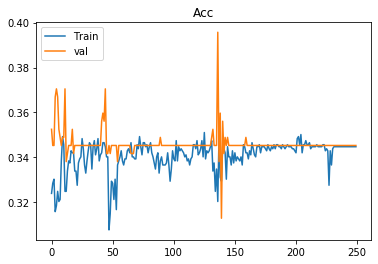

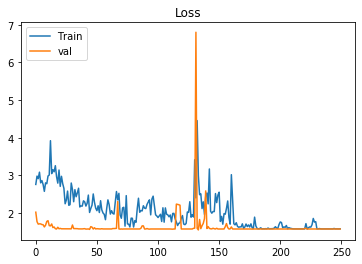

In [36]:
plt.plot(history_LSTM.epoch, history_LSTM.history['acc'])
plt.plot(history_LSTM.epoch, history_LSTM.history['val_acc'])
plt.title('Acc')
plt.legend(['Train', "val"], loc='upper left')
plt.show()

plt.plot(history_LSTM.epoch, history_LSTM.history['loss'])
plt.plot(history_LSTM.epoch, history_LSTM.history['val_loss'])
plt.title('Loss')
plt.legend(['Train', "val"], loc='upper left')
plt.show()
